In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("cell2cell_cleaned.csv")
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,1,0,0,0,4,0,0,1,1
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1,0,0,1,0,5,0,0,0,4
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,0,0,1,0,6,0,0,0,3
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,1,0,0,1,0,6,0,0,0,4
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,0,0,0,0,9,0,1,0,1


### Double-Check For NULL:

In [5]:
num_null = data.isnull().sum()
null_percent = 100 * data.isnull().sum() / len(data)
total = data.count()
zeros = data[data==0].count()
table = pd.concat([num_null,null_percent, total,zeros], axis=1)
table = table.rename(columns = {0 :'Number of Nan Values', 1 : '% of Nan Data', 2 : 'Total Number of Values' , 3 : 'Number of Zeros'})
table

,Number of Nan Values,% of Nan Data,Total Number of Values,Number of Zeros
Churn,0,0.0,49752,35507
MonthlyRevenue,0,0.0,49752,4
MonthlyMinutes,0,0.0,49752,671
TotalRecurringCharge,0,0.0,49752,118
DirectorAssistedCalls,0,0.0,49752,23955
OverageMinutes,0,0.0,49752,22761
RoamingCalls,0,0.0,49752,34157
PercChangeMinutes,0,0.0,49752,1099
PercChangeRevenues,0,0.0,49752,5739
DroppedCalls,0,0.0,49752,7464


In [6]:
data.duplicated().sum()

0

In [7]:
data['TotalCalls'] = data['InboundCalls'] + data['OutboundCalls']
data['TotalCallsInOut'] = data['PeakCallsInOut'] + data['OffPeakCallsInOut']

In [8]:
numerical_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'TotalCalls', 'TotalCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
numerical_data = data[numerical_columns].copy()
numerical_data

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,...,1.0,1.0,883.0,48.0,48.0,0,0,0,4,0
49748,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,...,1.0,1.0,883.0,58.0,0.0,0,0,0,3,0
49749,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,...,1.0,1.0,882.0,50.0,60.0,0,0,0,7,0
49750,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,...,2.0,2.0,489.0,22.0,0.0,0,0,0,2,0


In [9]:
categorical_columns = [ 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating']
categorical_data = data[categorical_columns].copy()     
categorical_data

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating
0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1
1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,4
2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,3
3,0,0,1,0,0,1,1,0,0,0,1,1,0,0,4
4,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,1,0,1,0,0,0,0,0,0,1,1,0,0,0,2
49748,0,0,1,0,0,1,1,0,0,0,1,0,0,0,3
49749,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
49750,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5


# Data Selection for EDA:

### Reasons:


#### Numerical Attributes

1. CurrentEquipmentDays: This represents the number of days the customer has been using their current equipment (e.g., mobile device). Older equipment might lead to dissatisfaction due to performance issues, potentially increasing churn.

2. RetentionCalls: The number of calls made to the retention team or received from them can indicate customer dissatisfaction or issues serious enough that intervention was needed to retain the customer. Frequent interactions with the retention team often correlate with higher churn risk.

3. TotalCallsInOut: Total incoming and outgoing calls could reflect how actively the customer uses the services. Low usage can be an indicator of low engagement or dissatisfaction.

4. PercChangeMinutes: This shows the percentage change in usage minutes over a certain period. Significant changes can signal a change in the customer's satisfaction or needs, which could influence their decision to stay with or leave the provider.

5. MonthsInService: The duration for which the customer has been with the company. Longer durations can indicate loyalty, while shorter durations might suggest higher churn probability among newer customers.

6. OverageMinutes: Minutes exceeding the plan limits could lead to unexpected charges, possibly causing customer frustration and increased churn risk.

7. CustomerCareCalls: The number of times a customer contacts customer service can indicate dissatisfaction, depending on the context and frequency of these calls.

8. MonthlyRevenue: Indicates the financial value of the customer to the company. Higher revenues can sometimes mean better service levels or more incentives to retain these customers.

9. TotalRecurringCharge: Regular charges the customer incurs. Changes or discrepancies in these charges can affect customer satisfaction.

10. MonthlyMinutes: Total minutes of service used per month. This can reflect customer engagement and satisfaction with the service.

    
#### Categorical Attributes

1. CreditRating: Customers with lower credit ratings might be perceived as having higher churn risk due to potential financial instability.

2. MadeCallToRetentionTeam: Direct indicator of a customer's dissatisfaction and a proactive step from the customer to resolve issues, which often correlates with churn risk.

3. HandsetWebCapable: Indicates whether the customer's phone can access the web, which could affect their satisfaction with the service, especially as data usage becomes increasingly important.

4. NewCellphoneUser: New users might be more volatile or prone to churn as they might still be comparing different service providers.

5. HasCreditCard: Owning a credit card might indicate financial stability and could correlate with lower churn.

6. HandsetRefurbished: Customers with refurbished handsets might experience more issues than those with new devices, potentially leading to higher churn.

    
These are the more relevant attributes which can provide valuable insights into customer behavior and their relationship with the service provider, thereby greater correlation with churn rates.

In [10]:
selected_numerical = ['CurrentEquipmentDays','RetentionCalls','TotalCallsInOut', 'PercChangeMinutes', 'MonthsInService', 'OverageMinutes', 'CustomerCareCalls', 'MonthlyRevenue','TotalRecurringCharge','MonthlyMinutes']
selected_categorical = ['CreditRating','MadeCallToRetentionTeam', 'HandsetWebCapable', 'NewCellphoneUser', 'HasCreditCard', 'HandsetRefurbished']
df_numerical = data[selected_numerical].copy()
df_categorical = data[selected_categorical].copy()

In [11]:
df_numerical.head()

,CurrentEquipmentDays,RetentionCalls,TotalCallsInOut,PercChangeMinutes,MonthsInService,OverageMinutes,CustomerCareCalls,MonthlyRevenue,TotalRecurringCharge,MonthlyMinutes
0,361.0,1,82.0,-157.0,61,0.0,0.0,24.00,22.0,219.0
1,1504.0,0,6.0,-4.0,58,0.0,0.0,16.99,17.0,10.0
2,1812.0,0,5.0,-2.0,60,0.0,0.0,38.00,38.0,8.0
3,458.0,0,859.4,157.0,59,0.0,4.3,82.28,75.0,1312.0
4,852.0,0,0.0,0.0,53,0.0,0.0,17.14,17.0,0.0


In [12]:
df_categorical.head()

,CreditRating,MadeCallToRetentionTeam,HandsetWebCapable,NewCellphoneUser,HasCreditCard,HandsetRefurbished
0,1,1,1,0,1,0
1,4,0,0,1,1,0
2,3,0,0,1,1,0
3,4,0,1,1,1,0
4,1,0,0,0,1,0


# EDA:

## Distribution of Churn:

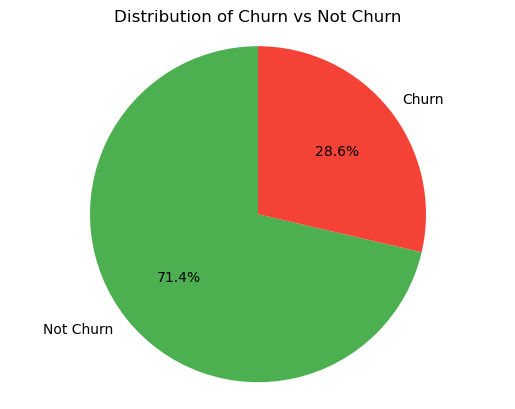

In [13]:
churn_counts = data['Churn'].value_counts()

# Plotting a pie chart for the distribution of churn
fig, ax = plt.subplots()
ax.pie(churn_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Churn vs Not Churn')
plt.show()

## Numerical-Categorical:

### 1) Statistical Summary:

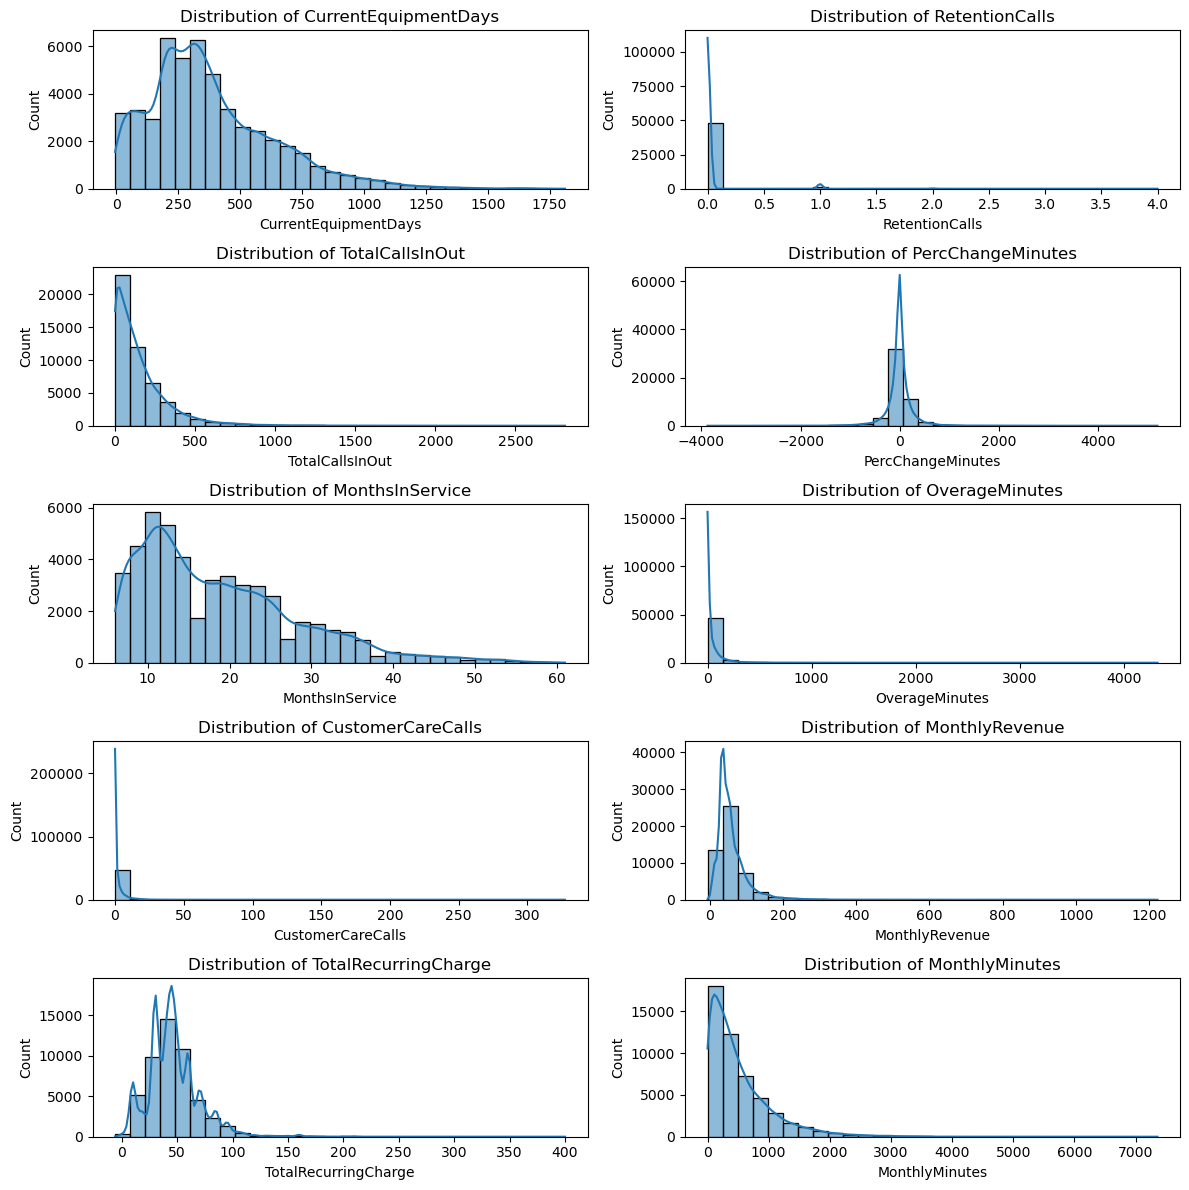

In [14]:
numeric_features = [col for col in df_numerical.columns]

# Calculate the number of rows and columns for the grid
num_plots = len(numeric_features)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array if it's not already flattened
axes = axes.flatten() if num_plots > 1 else [axes]

# Plot each feature
for i, feature in enumerate(numeric_features):
    sb.histplot(df_numerical[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide empty subplot(s) if there are fewer plots than total subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Histogram Analysis

- CurrentEquipmentDays: Right-skewed distribution may suggest that customers with very old equipment are fewer but could be at higher risk of churn due to potential dissatisfaction with outdated technology.


- RetentionCalls: A peak at zero indicates that most customers have not made calls to retention teams, which is typical. However, those who have made such calls could be considered at risk for churn since they may have already considered leaving.


- TotalCallsInOut: Most customers have a lower number of calls, but those with extremely high call counts might be either very engaged or possibly frustrated with services, both of which could influence churn in different ways.


- PercChangeMinutes: Extreme values on both ends might represent significant changes in usage behavior, which could be a red flag for churn if the change represents a decrease in usage.


- MonthsInService: Customers with a short tenure might not yet have formed a strong loyalty and could be more prone to churn. Conversely, very long tenure might indicate satisfied customers, but there could also be a segment that remains due to inertia and might consider switching if given a strong incentive.


- OverageMinutes: Customers incurring overage might be dissatisfied with their current plans, which could lead to churn. High overage can indicate a plan that is not well-suited to the customer's needs.


- CustomerCareCalls: A high number of such calls can indicate problems or dissatisfaction, which may predict churn.


- MonthlyRevenue: Lower monthly revenue may suggest lower engagement or subscription to less expensive services. If the revenue is due to the customer's choice of a less expensive plan, it may not indicate churn, but if due to less usage, it might.


- TotalRecurringCharge: Lower charges might indicate lower levels of service, which could be less sticky and thus more prone to churn.


- MonthlyMinutes: Customers with very low usage may not find much value in their service, potentially leading to churn. Conversely, high usage indicates engagement, but without context, it's unclear how this relates to churn.

### Logarithmic Transformation

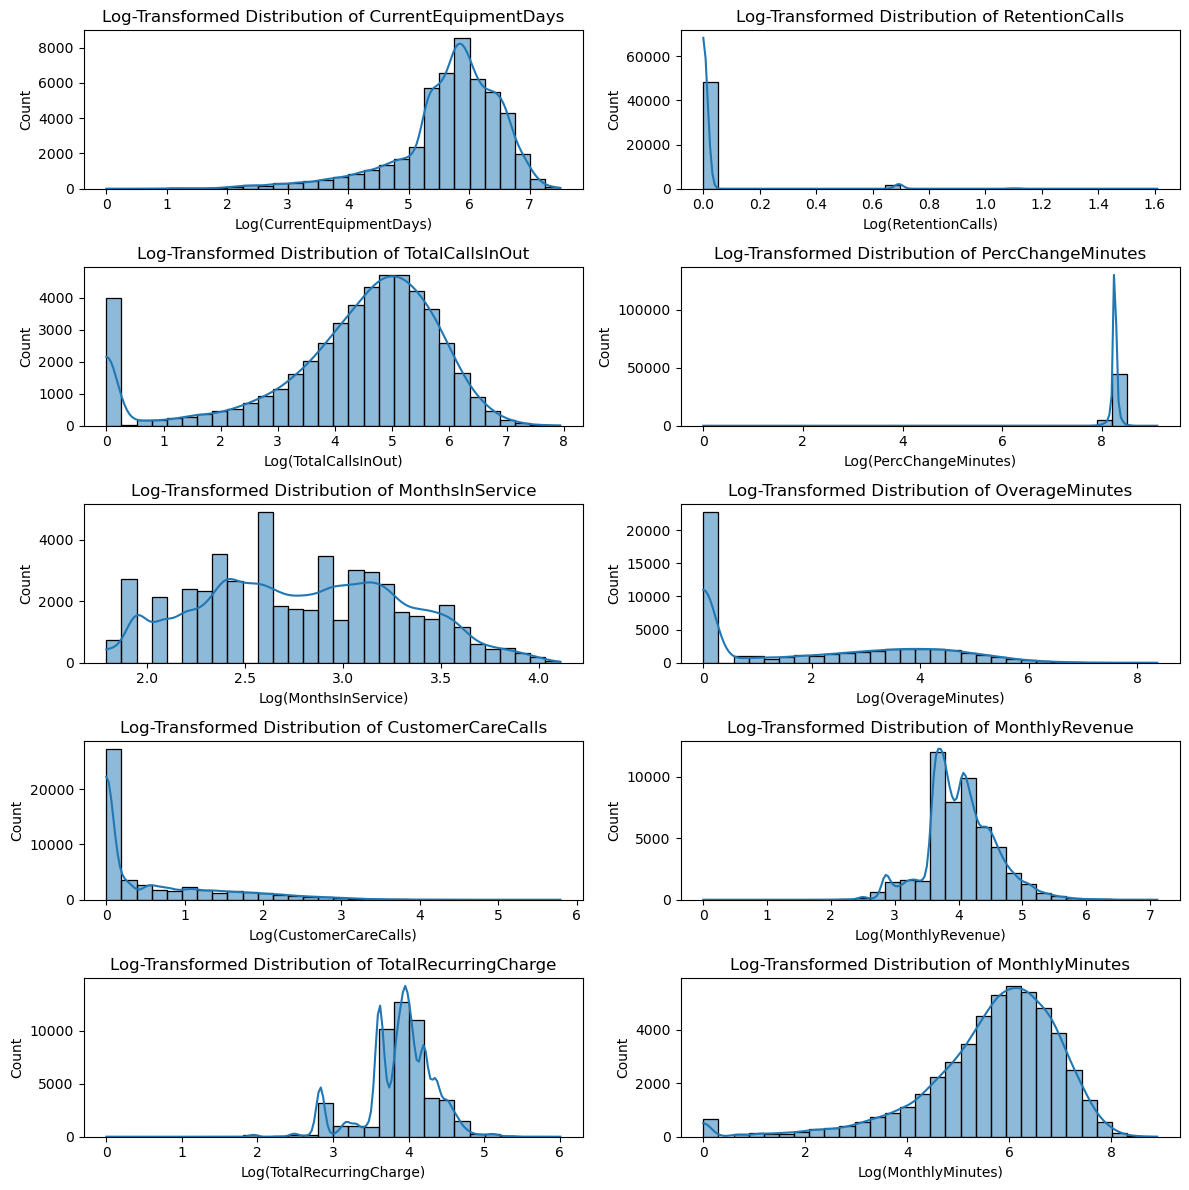

In [15]:
numeric_features = [col for col in df_numerical.columns]

# Calculate the number of rows and columns for the grid
num_plots = len(numeric_features)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array if it's not already flattened
axes = axes.flatten() if num_plots > 1 else [axes]

# Plot each feature with log transformation, handling non-positive values
for i, feature in enumerate(numeric_features):
    # Shift data to be strictly positive
    min_value = df_numerical[feature].min()
    shift = 1 - min_value if min_value <= 0 else 0
    data_transformed = np.log(df_numerical[feature] + shift)
    sb.histplot(data_transformed, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Log-Transformed Distribution of {feature}')
    axes[i].set_xlabel(f'Log({feature})')
    axes[i].set_ylabel('Count')

# Hide empty subplot(s) if there are fewer plots than total subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 2) BoxPlots:

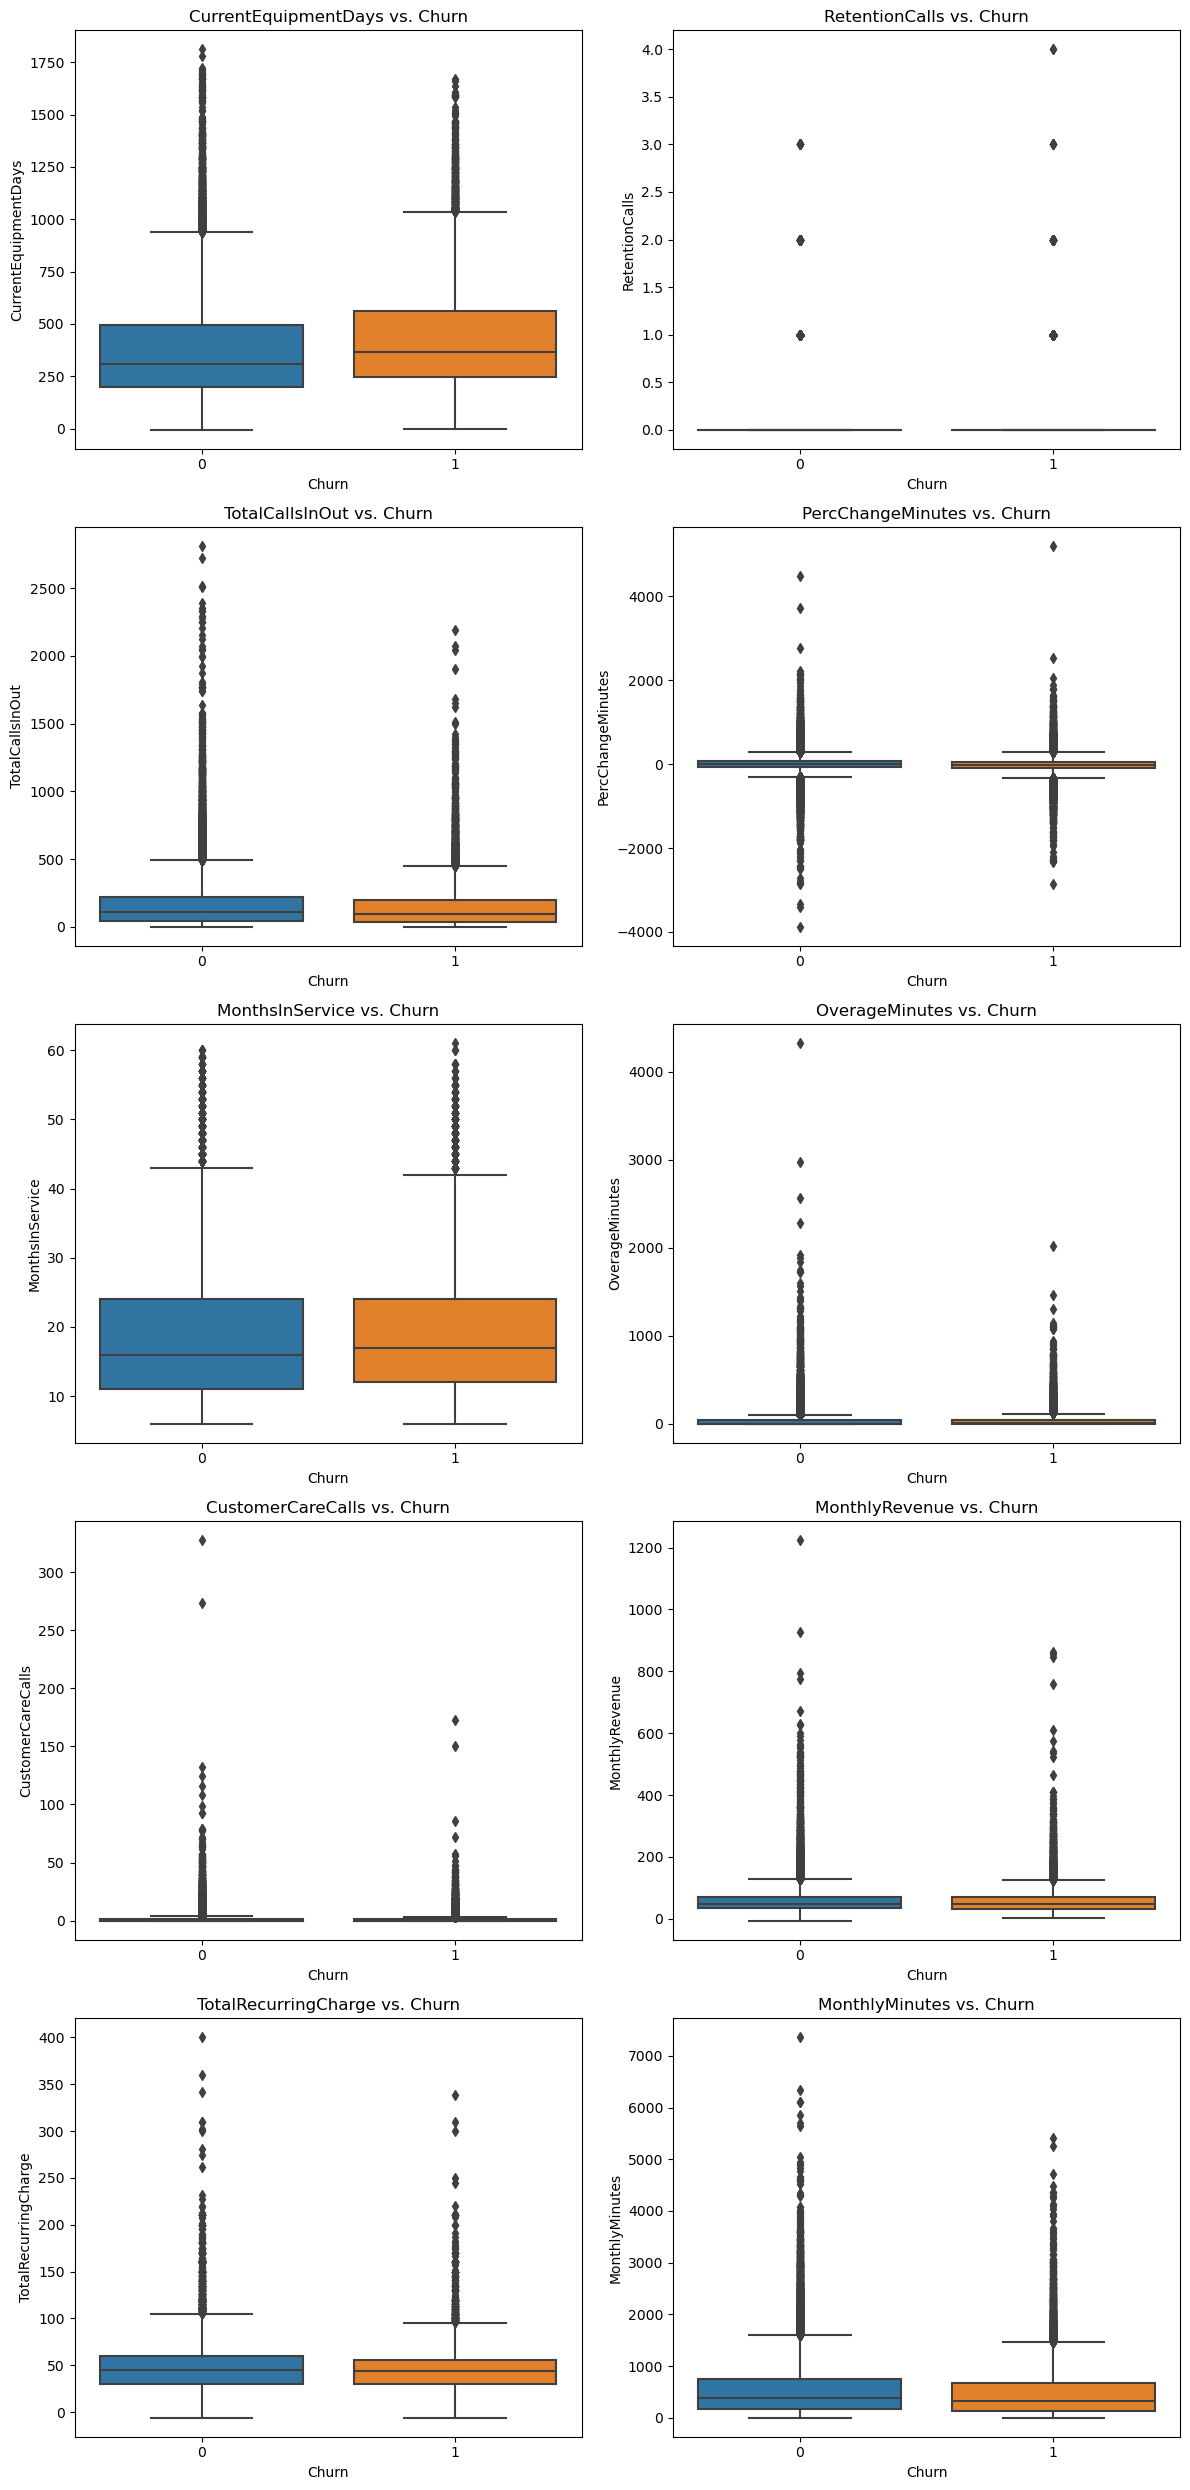

In [16]:
numeric_features = [col for col in df_numerical.columns]

# Calculate the number of rows and columns for the grid
num_plots = len(numeric_features)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure enough rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

# Flatten the axes array if it's not already flattened
axes = axes.flatten() if num_plots > 1 else [axes]

# Plot each feature
for i, feature in enumerate(numeric_features):
    sb.boxplot(x='Churn', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

# Hide empty subplot(s) if there are fewer plots than total subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Boxplot Analysis

- CurrentEquipmentDays: Customers who churned tend to have been using their current equipment for a shorter period than those who didn't churn, as seen by the median value of the boxplot for churned customers.
- TotalRecurringCharge & MonthlyRevenue: These financial-related attributes show some differences in median values between churned and not churned customers, with churned customers often having lower charges and revenue. This may indicate sensitivity to pricing or that lower spending customers are more likely to churn.
- RetentionCalls: Churned customers have more retention calls, indicating that customers who are calling to address issues or concerns may be at a higher risk of churning.
- MonthlyMinutes & TotalCallsInOut: These usage-related attributes show higher median values for churned customers, which could signify either dissatisfaction with the service or that they are on plans not fitting their needs.
- For factors like CustomerCareCalls, OverageMinutes, PerChangeMinutes and RetentionCalls, we cannot really deduce much information using the boxplot so we placed little empathsis on these factors in this section of EDA. 

## Categorical-Categorical:

### 1) CatPlots:

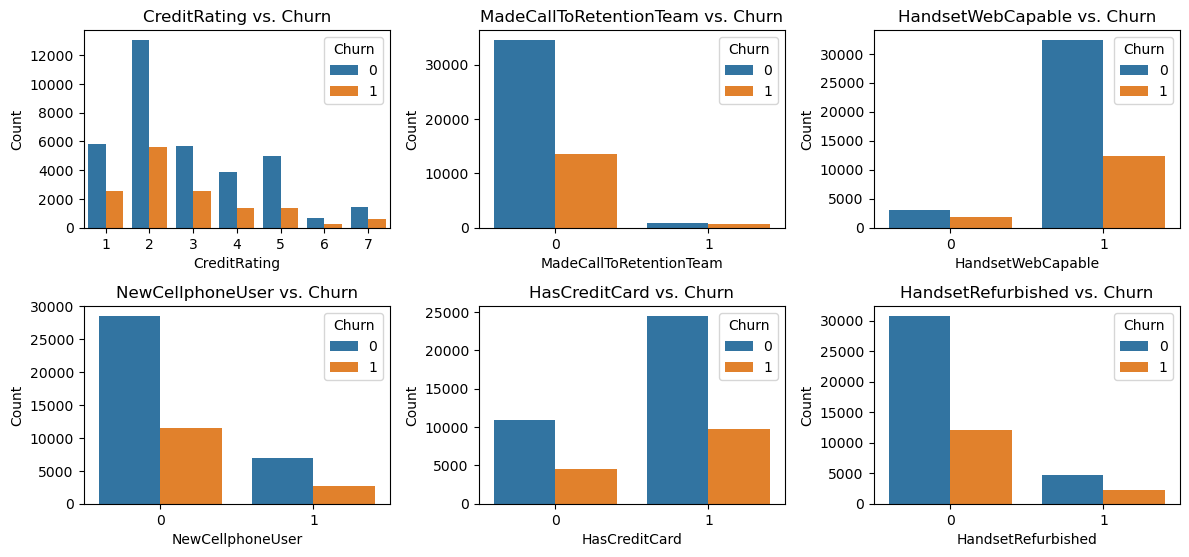

In [17]:
categorical_features = [col for col in df_categorical.columns]

# Plot each feature's impact on churn
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sb.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'{feature} vs. Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

### Bar Chart Analysis

- CreditRating: There appears to be a varying churn rate across different credit ratings, with certain ratings showing a higher proportion of churn.
- MadeCallToRetentionTeam: A higher proportion of customers who made a call to the retention team ended up churning compared to those who did not.
- HandsetWebCapable: Churn seems to be lower among customers with web-capable handsets.
- HandsetRefurbished: Customers with refurbished handsets show a higher churn rate.
- HasCreditCard: Having a credit card does not show a stark difference in churn rates.
- NewCellphoneUser: There's a small difference in churn between new cellphone users and more established users, with new users showing slightly more churn.
